In [1]:
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.learning_curve import learning_curve
from sklearn.grid_search import GridSearchCV

/Users/winglai/virtualenv/udacity/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/winglai/virtualenv/udacity/lib/python2.7/site-packages/sklearn/learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)
/Users/winglai/virtualenv/udacity/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Thi

In [2]:
from sklearn.cross_validation import train_test_split,KFold

In [3]:
df = pd.read_csv('data/titanic.cleaned.csv')

In [4]:
df.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S
0,0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
2,2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,0,0,1
4,4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,0,0,1


In [5]:
X = df[['Pclass', 'Sex', 'Age','Fare','SibSp','Parch', 'C','Q','S']].values # features

In [6]:
y = df['Survived'].values # labels

We need to serarate our training and testing sets. If we test and train on the _same_ dataset, we are cheating. We looked at the answers on the test before we took the test.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [9]:
print "Total datapoints: {}\n size of training set: {}\n size of test set: {}".format(len(y),len(y_train),len(y_test))

Total datapoints: 891
 size of training set: 712
 size of test set: 179


Let's redo our first experiment with proper data management practices. Using a training and testing set.

In [10]:
clf = KNeighborsClassifier() # create a classifier 

In [11]:
clf.fit(X_train,y_train) # train the classifier on only our training set data

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [12]:
y_pred = clf.predict(X_test) # make predictions on only our test set data

In [13]:
accuracy_score(y_pred,y_test) # test

0.69273743016759781

Well, what happened? Our accuracy went down the tubes. This is because we were cheating ourselves when we thought we had a 80% accuracy. Our accuracy on *unseen* data is much lower. This tells us that we have not made not made our machine learning algorithm general enough--it has fit the training data too well. This is called **overfitting** and is a key concept in machine learning.

In [14]:
clf = KNeighborsClassifier(n_neighbors=3) # create a classifier n_neighbors

Overfitting is a symptom of your model being too complex. One common way to fix overfitting is to reduce the complexity of your model--this enables a more general model that fits better to unseen data. In the cell above we reduced the number of neighbors the model uses from 5 (default) to 3.

In [15]:
clf.fit(X_train,y_train) # train the classifier on only our training set data
y_pred = clf.predict(X_test) # make predictions on only our test set data
accuracy_score(y_pred,y_test) # test

0.71508379888268159

Great! We were able to increse performance by making our model less complex. At this point, we might ask ourselves, does testing our data on the same set of points each time give us the best picture of how our model works? The answer is no. Often we will want to use the data so that each data point has a chance to be used in training as well as testing. One method of this is called **cross validation** and is very often used in machine learning.

`KFold` will split the data into some number of consectutive splits, yeilding the index of the split data at each iteration

In [20]:
kf = KFold(len(X),3)
results = []
for train_index, test_index in kf:
    # Assign data
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    #
    clf = KNeighborsClassifier() # create a classifier n_neighbors
    clf.fit(X_train,y_train) # train the classifier on only our training set data
    y_pred = clf.predict(X_test) # make predictions on only our test set data
    acc = accuracy_score(y_pred,y_test) # test
    results.append(acc)
np.array(results).mean()
    

0.70594837261503918

Another way to combat overfitting is to add data to your traning set. Let's see if that would help out in this case

In [21]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 10)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


<module 'matplotlib.pyplot' from '/Users/winglai/virtualenv/udacity/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

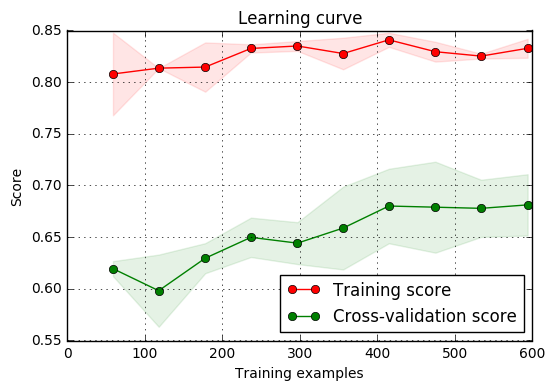

In [22]:
clf = KNeighborsClassifier(n_neighbors=3) # create a classifier n_neighbors
plot_learning_curve(clf,"Learning curve",X,y)

It looks like our model is hitting a maximum around 400 training examples, suggesting that increasing the amount of data we have will not help our overfitting problem. 


# Grid search or: How I learned to Stop Worrying and Love Parallel Processing
![alt text](data/drstrangelove_0_1.jpeg "Title")![alt text](data/drstrangelove_0_1.jpeg "Title")![alt text](data/drstrangelove_0_1.jpeg "Title")

There are often many parameters that can be varied in a machine learning model. Grid search is technique used to find the best combination of parameters. Grid search is often used in conjunction with cross validation. So often in fact, that sklearn combines them into one API call `sklearn.grid_search.GridSearchCV`

In [23]:
knn = KNeighborsClassifier() # create a classifier n_neighbors



GridSearchCV takes a classifier-type object and a dict of parameters to serach through

In [24]:
parameters = {'n_neighbors':range(1,10),'weights':['uniform','distance'],'leaf_size':range(1,40,5)}

In [25]:
clf = GridSearchCV(knn, parameters, n_jobs=-1)

In [26]:
clf.fit(X,y)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'weights': ['uniform', 'distance'], 'leaf_size': [1, 6, 11, 16, 21, 26, 31, 36]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

Let's see which model performed the best

In [27]:
print clf.best_params_ 
print clf.best_score_

{'n_neighbors': 8, 'weights': 'distance', 'leaf_size': 1}
0.710437710438
